In [3]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpl_patches

In [1]:
# Directory and shapefiles
folder_path = "Data/Field_shapefiles"
shapefile_names = ["Plots_c16A.shp", "Plots_c6-12.shp", "Plots_SW16.shp", "Plots_Y10.shp", "Plots_Y8.shp"]
shapefile_paths = [f"{folder_path}/{name}" for name in shapefile_names]

# Define the treatment values
treatments = {
    "16A": {
        "low": {"plots": ['3', '10', '18'], "value": 11.3},
        "medium": {"plots": ['7', '14', '15'], "value": 22.5},
        "high": {"plots": ['6', '11', '19'], "value": 33.8}
    },
    "6-12": {
        "low": {"plots": ['6', '10', '20'], "value": 16.9},
        "medium": {"plots": ['4', '14', '18'], "value": 22.5},
        "high": {"plots": ['8', '12', '16'], "value": 28.2}
    },
    "SW16": {
        "low": {"plots": ['3', '11', '13'], "value": 9},
        "medium": {"plots": ['1', '9', '15'], "value": 18},
        "high": {"plots": ['5', '7', '17'], "value": 27}
    },
    "Y10": {
        "low": {"plots": ['5', '13', '21'], "value": 5.6},
        "medium": {"plots": ['3', '9', '17'], "value": 11.3},
        "high": {"plots": ['7', '15', '19'], "value": 16.9}
    },
    "Y8": {
        "low": {"plots": ['5', '7', '21', '23'], "value": 3.4},
        "medium": {"plots": ['10', '12', '18', '20'], "value": 6.8},
        "high": {"plots": ['13', '15', '26', '28'], "value": 10.1}
    }
}

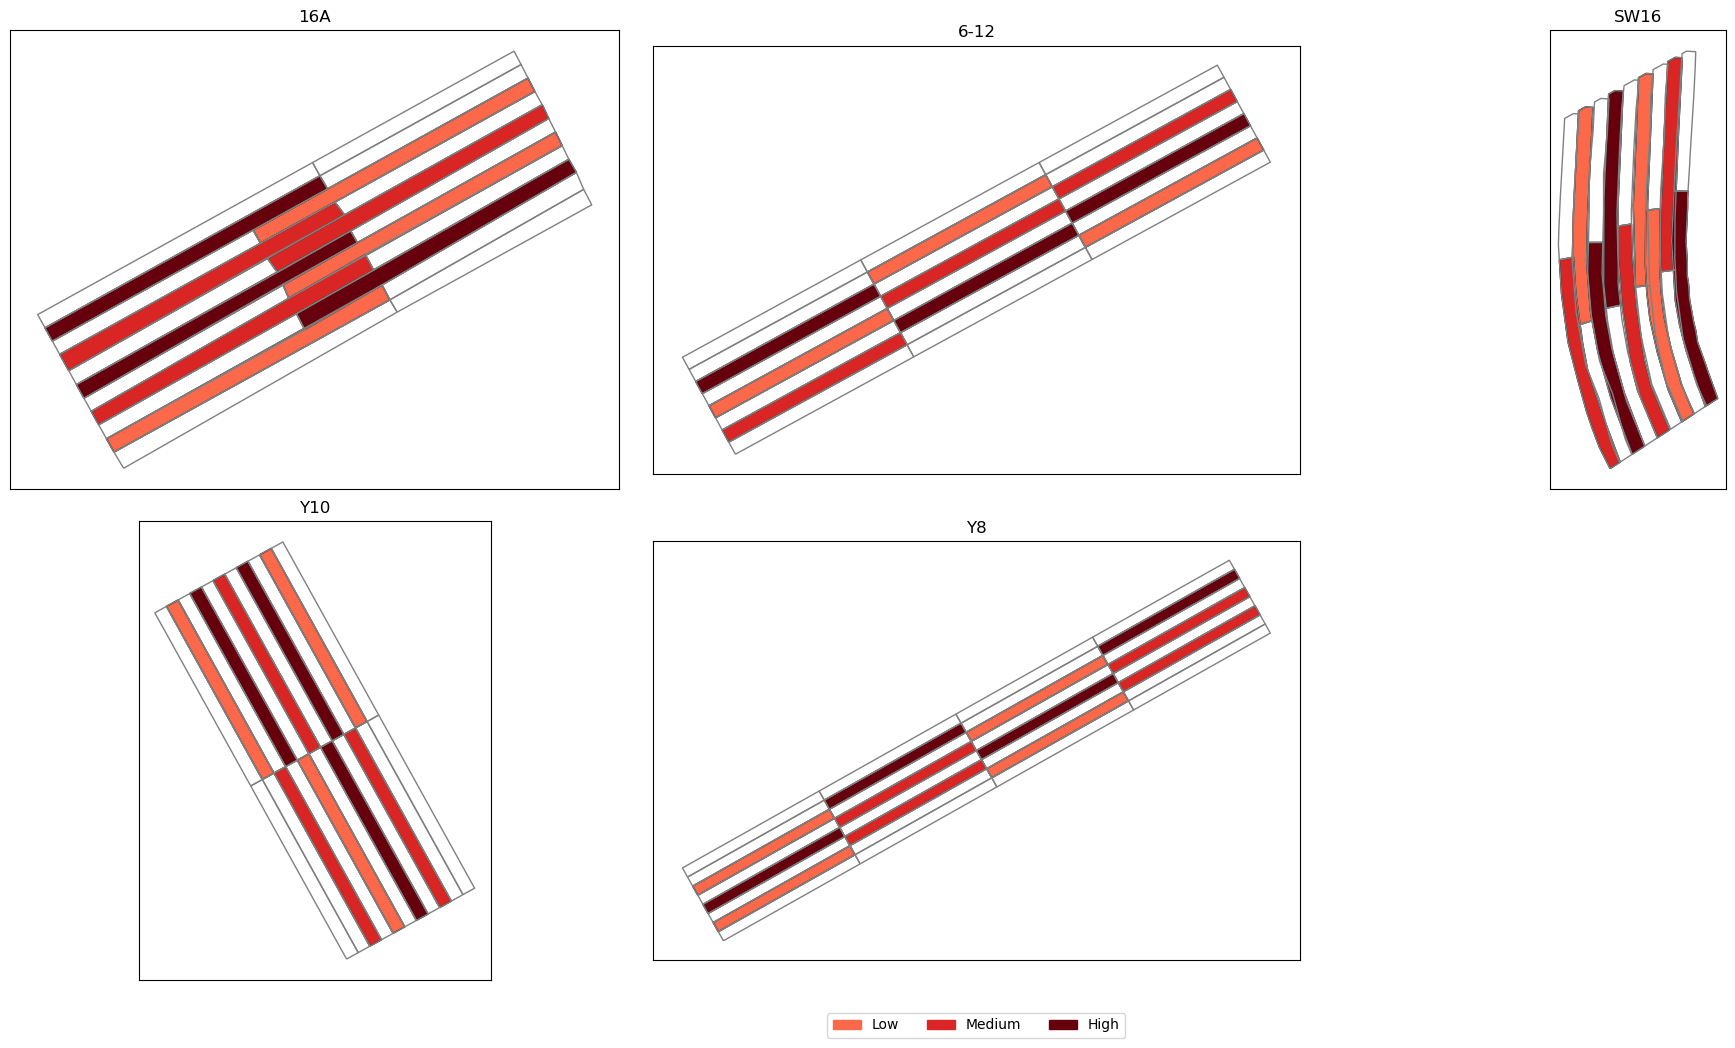

<Figure size 640x480 with 0 Axes>

In [4]:
# Create subplots for each shapefile in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Removing the bottom right subplot
fig.delaxes(axes[1,2])

# Flatten the 2D array of axes to easily iterate over them
axes = axes.ravel()

# Create a color scale for 'low', 'medium', and 'high'
colors = plt.cm.Reds([0.5, 0.7, 1.0])
color_map = {
    "low": mcolors.rgb2hex(colors[0]),
    "medium": mcolors.rgb2hex(colors[1]),
    "high": mcolors.rgb2hex(colors[2])
}

for ax, path, (key, value) in zip(axes, shapefile_paths, treatments.items()):
    # Load shapefile
    gdf = gpd.read_file(path)
    
    # Determine the data type of the 'PlotID' column
    plot_id_dtype = gdf['PlotID'].dtype

    # Plotting base layer
    gdf.boundary.plot(ax=ax, color='gray', linewidth=1)
    ax.set_aspect('equal')  # Manually set the aspect ratio
    ax.set_xticks([])  # Remove x axis tick labels
    ax.set_yticks([])  # Remove y axis tick labels
    
    # Plotting each treatment level
    for treatment, color in color_map.items():
        
        if plot_id_dtype == 'int64':  # If the plot IDs in the shapefile are integers
            plots = [int(pid) for pid in value[treatment]["plots"]]
        else:
            plots = value[treatment]["plots"]
        
        gdf_filtered = gdf[gdf['PlotID'].isin(plots)]
        
        # Check if gdf_filtered is not empty
        if not gdf_filtered.empty:
            gdf_filtered.plot(ax=ax, color=color, edgecolor='black')
        else:
            print(f"No matching plots for treatment {treatment} in shapefile {key}")

    # Setting the title
    ax.set_title(key)

# Create a custom legend using the color map
legend_patches = [mpl_patches.Patch(color=color, label=treatment.capitalize()) for treatment, color in color_map.items()]
fig.legend(handles=legend_patches, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))

# Adjusting layout and showing the plot
fig.tight_layout()
plt.show()
plt.savefig('Output/Figures/Plots_figure.jpg', bbox_inches = 'tight', dpi = 300)